# Excercise 5
## Neural Networks in Keras

Use keras framework to solve the below exercises.


In [ ]:
#Se realiza importación de librerias
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt

## 5.1 Predict rating of a movie using Keras

**Exercise:** Use keras framework to predict rating.

In [ ]:
#Se importa la información de un archivo csv en cierta ruta especifica
dataTraining = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)

In [ ]:
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


La tabla contiene registros de titulos de peliculas con su descripción, genero, puntuación y año de estreno

In [ ]:
plots = dataTraining['plot']
# Se crea una variable dummy donde true indica que la calificación es mayor o igual que la media y los valores False indican que la calificación es menor que la media.
y = (dataTraining['rating'] >= dataTraining['rating'].mean()).astype(int)

In [ ]:
plots

3107    most is the story of a single father who takes...
900     a serial killer decides to teach the secrets o...
6724    in sweden ,  a female blackmailer with a disfi...
4704    in a friday afternoon in new york ,  the presi...
2582    in los angeles ,  the editor of a publishing h...
                              ...                        
8417    " our marriage ,  their wedding .  "  it ' s l...
1592    the wandering barbarian ,  conan ,  alongside ...
1723    like a tale spun by scheherazade ,  kismet fol...
7605    mrs .  brisby ,  a widowed mouse ,  lives in a...
215     tinker bell journey far north of never land to...
Name: plot, Length: 7895, dtype: object

In [ ]:
y

3107    1
900     0
6724    1
4704    1
2582    1
       ..
8417    0
1592    0
1723    0
7605    1
215     1
Name: rating, Length: 7895, dtype: int64

## Data Precosessing

- Remove stopwords
- Lowercase
- split the text in words
- pad_sequences

In [ ]:
!pip install wget
!pip install livelossplot --quiet

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=920f93b4a39bbc8f7d09f7318c0c02922fe7b38534c1961a8090a47c30c73c47
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
import pandas as pd
import numpy as np
import wget
import os
from zipfile import ZipFile

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import string

#Se importan diversas librerías y clases necesarias para construir y entrenar modelos de redes neuronales en Keras, así como para realizar visualizaciones y trabajar con modelos de procesamiento de lenguaje natural (NLP) utilizando gensim
from sklearn.model_selection import train_test_split

from keras import backend as K
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.utils import pad_sequences
from livelossplot import PlotLossesKeras

import matplotlib.pyplot as plt

import gensim
from gensim.models import Word2Vec
import warnings


warnings.filterwarnings('ignore')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
X = plots

Se realiza el preprocesamiento de los datos como:
Convertir el texto a minúsculas utilizando text.lower().
Eliminar los signos de puntuación del texto utilizando una comprensión de lista y la función string.punctuation.
Tokenizar el texto en palabras utilizando word_tokenize del módulo NLTK.
Eliminar stopwords en ingles
Unir las palabras procesadas en una cadena de texto utilizando ' '.join(tokens) y devolverla como resultado.

In [ ]:
stop_words = set(stopwords.words('english'))
def preprocess(text):
    text = text.lower()
    text = ''.join([word for word in text if word not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

X = X.apply(preprocess)

In [ ]:
X.head()

3107    story single father takes eight year old son w...
900     serial killer decides teach secrets satisfying...
6724    sweden female blackmailer disfiguring facial s...
4704    friday afternoon new york president tredway co...
2582    los angeles editor publishing house carol hunn...
Name: plot, dtype: object

In [ ]:
X = X.tolist()

In [ ]:
# construye un vocabulario a partir de los caracteres presentes en la trama
voc = set(''.join(X))#connjunto de caracteres únicos a partir de la cadena de caracteres resultante.
vocabulary = {x: idx + 1 for idx, x in enumerate(set(voc))}#crea un diccionario de comprensión que asigna a cada carácter único en el conjunto un índice único más uno.

In [ ]:
vocabulary

{'í': 1,
 'd': 2,
 'ò': 3,
 'u': 4,
 'ñ': 5,
 'z': 6,
 'o': 7,
 '®': 8,
 's': 9,
 'å': 10,
 'ç': 11,
 'f': 12,
 'h': 13,
 'a': 14,
 'j': 15,
 'ö': 16,
 'â': 17,
 'ê': 18,
 'v': 19,
 'g': 20,
 'á': 21,
 'ú': 22,
 '¹': 23,
 'é': 24,
 't': 25,
 'ø': 26,
 'w': 27,
 'c': 28,
 'û': 29,
 'ü': 30,
 'b': 31,
 'k': 32,
 'q': 33,
 'ó': 34,
 'y': 35,
 '½': 36,
 'à': 37,
 '°': 38,
 'ô': 39,
 'r': 40,
 'e': 41,
 'x': 42,
 'ë': 43,
 'i': 44,
 '¡': 45,
 'l': 46,
 '£': 47,
 ' ': 48,
 'è': 49,
 'ï': 50,
 'ʼ': 51,
 'n': 52,
 'p': 53,
 'ä': 54,
 'ù': 55,
 'm': 56}

In [ ]:
len(vocabulary)

56

In [ ]:
#conversión de caracteres a números y el relleno (padding) de secuencias.
# Max len
max_len = 200 #Máximo deseado para las secuencias de texto.
X = [x[:max_len] for x in X] # segura que cada texto en la lista X tenga como máximo una longitud de 150 caracteres.
# Convert characters to int and pad
X = [[vocabulary[x1] for x1 in x if x1 in vocabulary.keys()] for x in X]#: Este código convierte cada carácter en los textos de X en un número utilizando un vocabulario predefinido (vocabulary).

In [ ]:
len(X)

7895

In [ ]:
X_pad = pad_sequences(X, maxlen=max_len)#aplica el relleno (padding) a las secuencias de entrada

In [ ]:
X_pad

array([[ 9, 25,  7, ..., 53, 48, 28],
       [ 0,  0,  0, ..., 41, 40, 32],
       [ 9, 27, 41, ..., 25, 44, 56],
       ...,
       [ 0,  0,  0, ..., 14, 52,  2],
       [56, 40,  9, ..., 25,  9, 48],
       [ 0,  0,  0, ..., 40, 41, 41]], dtype=int32)

In [ ]:
# Se hace una partición de 30% de datos en prueba y el restante en entrenamiento, ademas se aplica un parametro de stratify para asegurar una evaluación más justa del modelo cuando las clases en la variable objetivo están desbalanceadas.
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, stratify = y, test_size = 0.3, random_state = 18)

## Build Model


Se construye un modelo de red neuronal para la clasificación binaria utilizando una capa de embedding seguida de una capa densa con activación sigmoide. El modelo se configura para minimizar la pérdida binaria durante el entrenamiento utilizando el optimizador SGD, y se evalúa el rendimiento del modelo utilizando la métrica de exactitud (accuracy)

In [ ]:
learning_rate = 0.01

In [ ]:
model = Sequential()
model.add(Embedding(len(vocabulary) + 1, 128, input_length=max_len))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          7296      
                                                                 
 dense (Dense)               (None, 200, 1)            129       
                                                                 
Total params: 7425 (29.00 KB)
Trainable params: 7425 (29.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


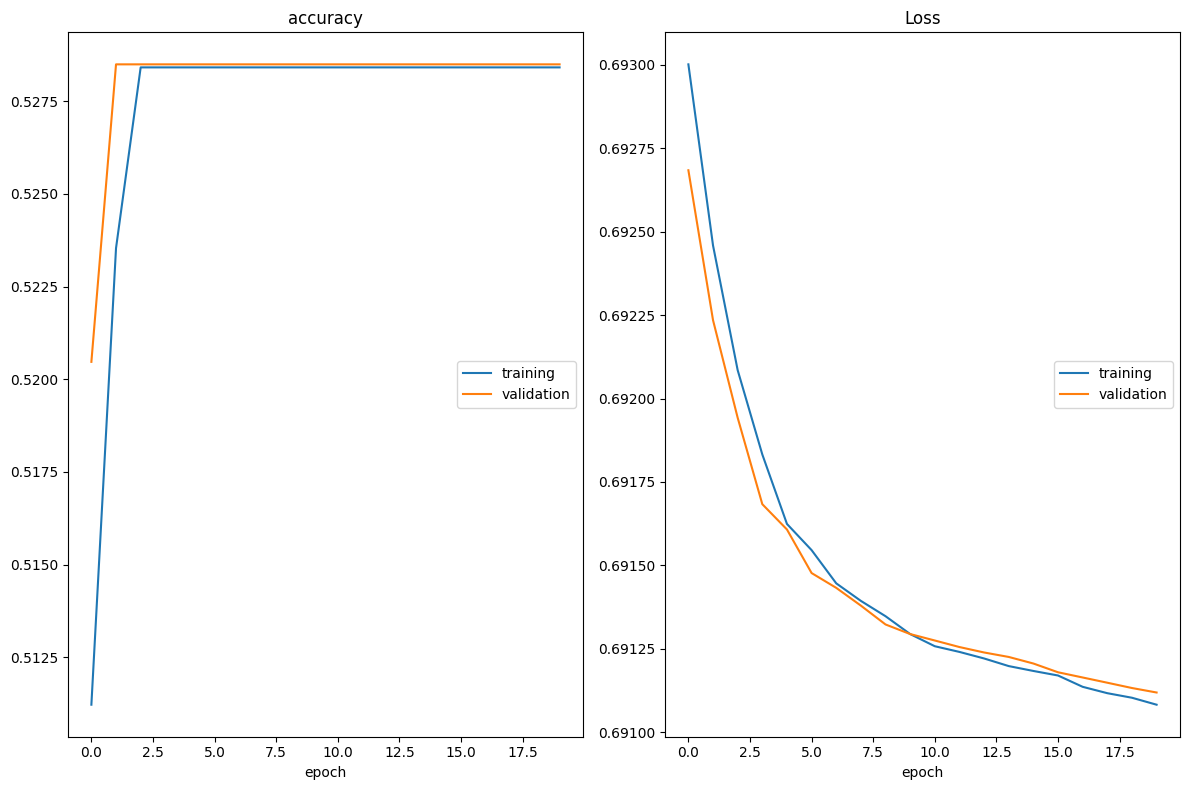

accuracy
	training         	 (min:    0.511, max:    0.528, cur:    0.528)
	validation       	 (min:    0.520, max:    0.528, cur:    0.528)
Loss
	training         	 (min:    0.691, max:    0.693, cur:    0.691)
	validation       	 (min:    0.691, max:    0.693, cur:    0.691)
44/44 [==============================] - 3s 71ms/step - loss: 0.6911 - accuracy: 0.5284 - val_loss: 0.6911 - val_accuracy: 0.5285


In [ ]:
import keras.optimizers as opts #importa los optimizadores de Keras. Pa

K.clear_session()#limpia la sesión de Keras para asegurarse de que no haya modelos anteriores o capas definidas en la sesión.


K.clear_session()

model = Sequential()
model.add(Embedding(len(vocabulary) + 1, 128, input_length=max_len))
model.add(Dense(64, activation='relu'))  # Primera capa intermedia con 64 unidades y activación ReLU
model.add(Dense(32, activation='relu'))  # Segunda capa intermedia con 32 unidades y activación ReLU
model.add(Dense(1, activation='sigmoid'))

op = opts.SGD(lr=learning_rate)

model.compile(loss='binary_crossentropy', optimizer=op, metrics=['accuracy'])

model.summary()

model.fit(X_train, y_train, validation_data=[X_test, y_test],
          batch_size=128, epochs=20, verbose=1,
          callbacks=[PlotLossesKeras()])#ntrena el modelo. Se especifican los datos de entrenamiento y visualizar la pérdida y la precisión durante el entrenamiento).

      Se observa que al realizar el nuevo modelo con mas capas y con funciones de activación relu con su parametrización de minimizar la perdida con base a tener el mejor AUC, se evidencia que el modelo de red neuronal predice bien y no tiene riesgos de overfiting ya que el entrenamiento y la validación tuvieron el mismo rendimiento de predicción y la misma perdida

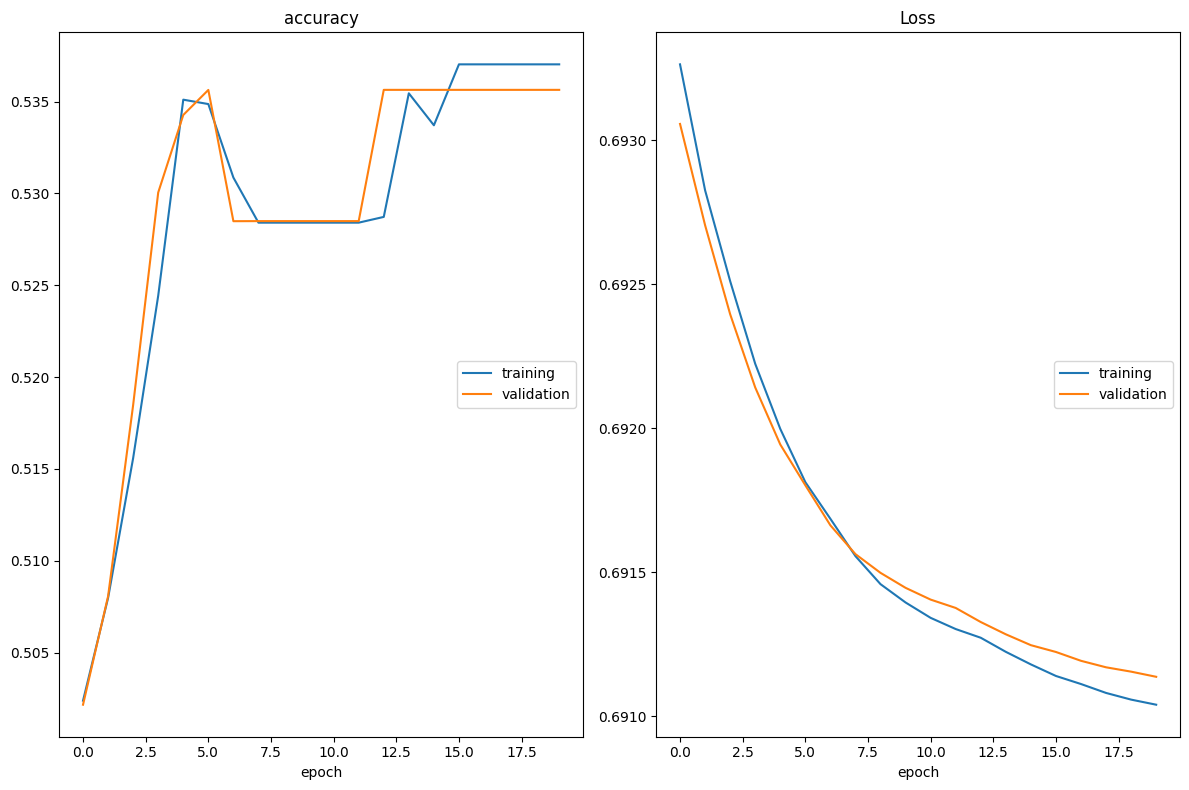

accuracy
	training         	 (min:    0.502, max:    0.537, cur:    0.537)
	validation       	 (min:    0.502, max:    0.536, cur:    0.536)
Loss
	training         	 (min:    0.691, max:    0.693, cur:    0.691)
	validation       	 (min:    0.691, max:    0.693, cur:    0.691)
44/44 [==============================] - 2s 39ms/step - loss: 0.6910 - accuracy: 0.5370 - val_loss: 0.6911 - val_accuracy: 0.5356


In [ ]:

K.clear_session()#limpia la sesión de Keras para asegurarse de que no haya modelos anteriores o capas definidas en la sesión.

model = Sequential()
model.add(Embedding(len(vocabulary) + 1, 128, input_length=max_len))
model.add(Dense(1, activation='sigmoid'))#Agrega una capa densa con una neurona de salida y activación sigmoide.

op = opts.SGD(lr=learning_rate)#optimizador SGD con la tasa de aprendizaje especificada.

model.compile(loss='binary_crossentropy', optimizer=op, metrics=['accuracy']) # Compila el modelo. Esto configura el proceso de entrenamiento del modelo. Se especifica la función de pérdida (binary_crossentropy )

model.summary()

model.fit(X_train, y_train, validation_data=[X_test, y_test],
          batch_size=128, epochs=20, verbose=1,
          callbacks=[PlotLossesKeras()])#Se entrena el modelo. Se especifican los datos de entrenamiento y visualizar la pérdida y la precisión durante el entrenamiento).

En este modelo de red neuronal realizado con una capa y una función de activación sigmoide refleja que el accuracy aumentó pero se ve que se pierde mas en el modelo a medida que aprende mas de los datos, dando a entender posible riesgo de overfiting

# 5.2 Decision Boundary --  Moons Dataset

**Exercise:** Use keras framework to find a decision boundary for point in the make_moons.

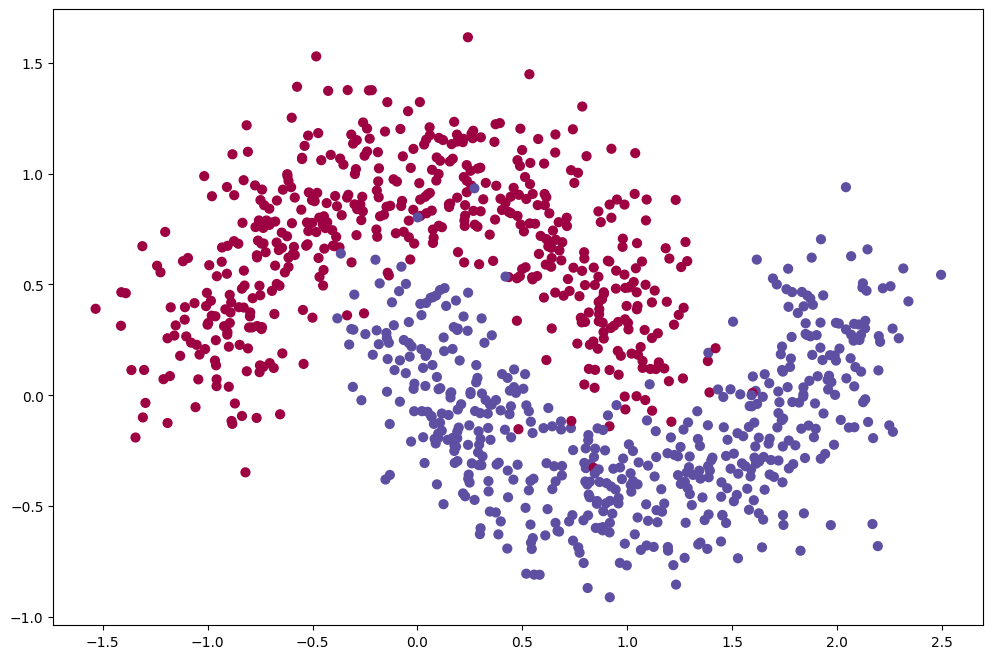

In [ ]:
# Create moons dataset.

from sklearn.datasets import make_moons

x_train, y_train = make_moons(n_samples=1000, noise= 0.2, random_state=3)
plt.figure(figsize=(12, 8))
plt.scatter(x_train[:, 0], x_train[:,1], c=y_train, s=40, cmap=plt.cm.Spectral);

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Definir el modelo de la red neuronal
model = Sequential()
model.add(Dense(64, input_dim=2, activation='relu')) #Se añade una capa densa con 64 neuronas, una entrada de dimensión 2 y función de activación ReLU
model.add(Dense(32, activation='relu')) #Se añade una capa densa con 32 neuronas y función de activación ReLU
model.add(Dense(1, activation='sigmoid')) #Se añade una capa densa con 1 neurona y función de activación sigmoide

# Compilar el modelo: Se establece que el rendimiento del modelo se medirá con la exactitud, por medio de una tasa de aprendizaje del 1% utilizando la función de pérdida 'binary_crossentropy'
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=1)



Epoch 1/50
32/32 [==============================] - 1s 2ms/step - loss: 0.6128 - accuracy: 0.8090
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 0.4389 - accuracy: 0.8700
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3313 - accuracy: 0.8700
Epoch 4/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2902 - accuracy: 0.8810
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2709 - accuracy: 0.8810
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2608 - accuracy: 0.8840
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2519 - accuracy: 0.8840
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2379 - accuracy: 0.8950
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2283 - accuracy: 0.9020
Epoch 10/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2177 - accuracy: 0.9070
Epoch 11/50
32/32 [

El modelo entrenado de acuerdo a la función de perdida parametrizado, genera un accuracy del 97,9% de efectividad en la predicción

**Hint:** Use the next function to plt the decision boundary,

1/1 [==============================] - 0s 21ms/step


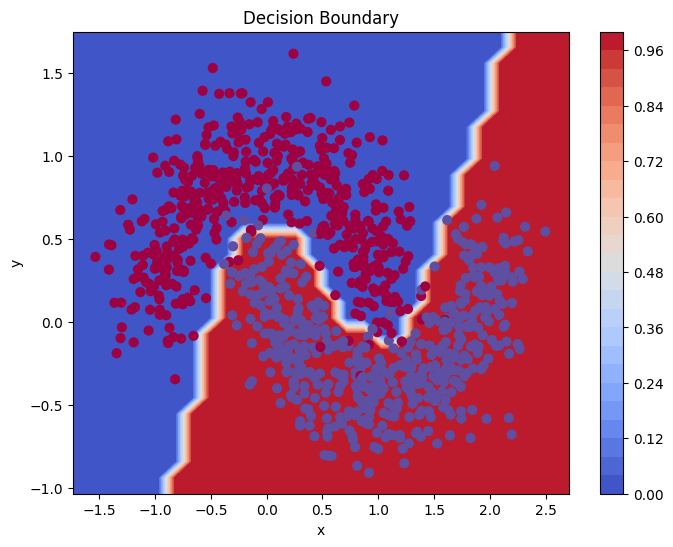

In [ ]:


# Función para visualizar la frontera de decisión
def plot_decision_region(model, X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 30)
    y_vals = np.linspace(min_y, max_y, 30)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(model, XX[i, j], YY[i, j])
    plt.contourf(XX, YY, ZZ, 30, cmap=plt.cm.coolwarm, vmin=0, vmax=1)
    plt.colorbar()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Decision Boundary")

def pred_fun(model, x1, x2):
    xval = np.array([[x1, x2]])
    return (model.predict(xval) > 0.5).astype("int32")[0][0]

plt.figure(figsize=(8, 6))
plot_decision_region(model, x_train, pred_fun)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.Spectral, s=40)
plt.show()

En el grafico se puede observar como se separan las dos clases de peliculas:
Las que tienen una puntuación por encima del promedio y las que no en donde se observa una buena separación de las dos clases